In [1]:
import warnings

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
book_rating_data = pd.read_csv("../b. Datasets/Book Ratings.csv")

In [3]:
book_rating_data.shape

(120000, 5)

In [4]:
print("Total number of users:", book_rating_data['user_id'].nunique())
print("Total number of books:", book_rating_data['book_id'].nunique())

Total number of users: 7956
Total number of books: 1201


In [5]:
book_rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Unnamed: 0.1  120000 non-null  int64
 1   Unnamed: 0    120000 non-null  int64
 2   book_id       120000 non-null  int64
 3   user_id       120000 non-null  int64
 4   rating        120000 non-null  int64
dtypes: int64(5)
memory usage: 4.6 MB


In [6]:
display(book_rating_data.head(2))
display(book_rating_data.tail(2))

,Unnamed: 0.1,Unnamed: 0,book_id,user_id,rating
0,0,0,1,314,5
1,1,1,1,439,3


,Unnamed: 0.1,Unnamed: 0,book_id,user_id,rating
119998,119998,119998,1201,7778,5
119999,119999,119999,1201,8060,3


In [7]:
book_rating_data.drop(labels=['Unnamed: 0.1', 'Unnamed: 0'], 
                      axis=1, 
                      inplace=True)

In [8]:
display(book_rating_data.head(2))
display(book_rating_data.tail(2))

,book_id,user_id,rating
0,1,314,5
1,1,439,3


,book_id,user_id,rating
119998,1201,7778,5
119999,1201,8060,3


In [9]:
book_review_counts = book_rating_data.book_id.value_counts()
book_review_counts

book_id
1       100
805     100
803     100
802     100
801     100
       ... 
419      99
1183     98
1180     97
1129     92
1201     16
Name: count, Length: 1201, dtype: int64

In [10]:
book_rating_data['Book Review Count'] = book_rating_data['book_id'].map(book_review_counts)

In [11]:
display(book_rating_data.head(2))
display(book_rating_data.tail(2))

,book_id,user_id,rating,Book Review Count
0,1,314,5,100
1,1,439,3,100


,book_id,user_id,rating,Book Review Count
119998,1201,7778,5,16
119999,1201,8060,3,16


In [12]:
popularity_table = book_rating_data.groupby('book_id').agg({
                                                            'rating': 'mean',
                                                            'Book Review Count': 'count'
                                                        }).sort_values(by='rating', 
                                                                       ascending=False)

In [13]:
popularity_table.shape

(1201, 2)

In [14]:
display(popularity_table.head(5))

,rating,Book Review Count
book_id,,
862,4.68,100
192,4.56,100
780,4.55,100
1029,4.54,100
1010,4.53,100


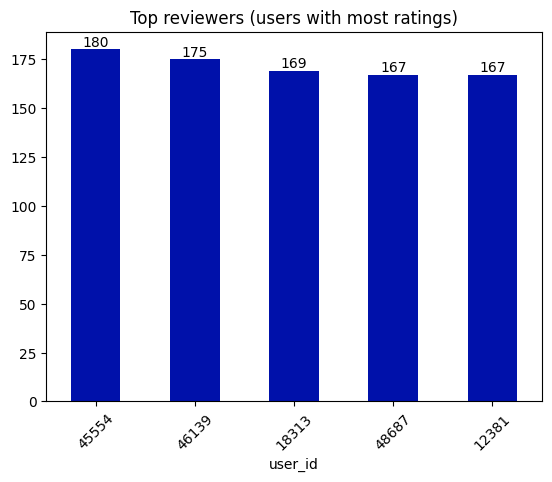

In [15]:
top_reviewers = book_rating_data['user_id'].value_counts().head(5)
barplot = top_reviewers.plot(kind='bar', color='#0011aa')
plt.bar_label(barplot.containers[0], label_type='edge')
plt.xticks(rotation=45)
plt.title("Top reviewers (users with most ratings)")
plt.show()